# Ch.5 Regression

#### 5.4 보스턴 주택 가격 예측

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from scipy import stats
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
bostonDF.shape

(506, 14)

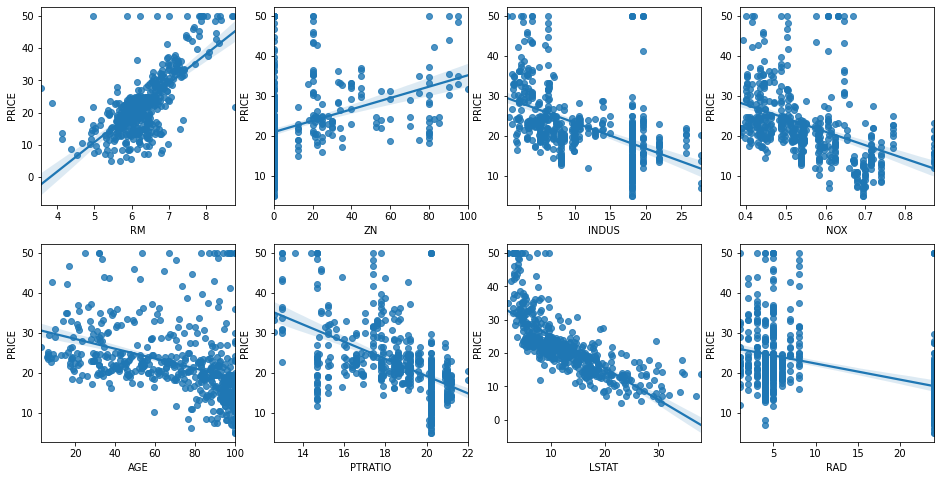

In [7]:
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = 'PRICE', data = bostonDF, ax = axs[row][col])

In [8]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 단일 변수에 대한 선형 회귀

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 160)

- 모델 불러와 객체 생성

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
sim_lr = LinearRegression()

- 모델 학습하기

In [15]:
sim_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [16]:
y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))

- 결과 확인하기

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

In [18]:
r2_score(y_test, y_pred)

0.5635874634171918

- 계수 w(weight), 절편 b(bias)

In [19]:
sim_lr.coef_, sim_lr.intercept_

(array([9.34529449]), -36.20415621348282)

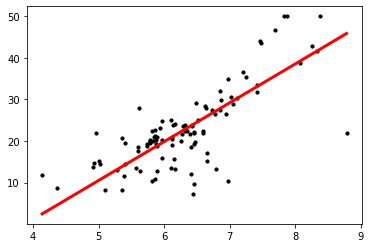

In [20]:
plt.scatter(X_test, y_test, s = 10, c = 'black')
line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1, 1))
plt.plot(line_x, line_y, c = 'red', lw = 3)

In [21]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = [4, 8]
y1 = 4 * w + b
y2 = 8 * w + b

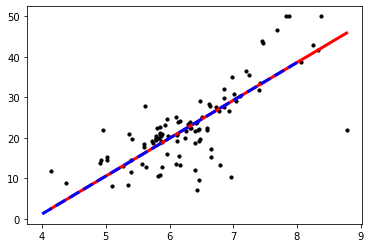

In [22]:
plt.scatter(X_test, y_test, s = 10, c = 'black')
plt.plot(line_x, line_y, 'red', lw = 3)
plt.plot(xs, [y1, y2], 'blue', lw = 3, ls = '--')

In [23]:
x = bostonDF['LSTAT']
y = boston.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 150)

In [25]:
sim_lr.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [26]:
y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))

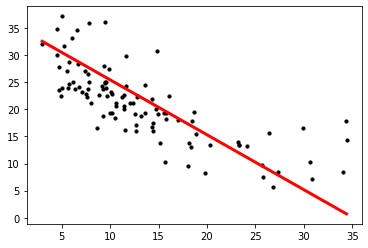

In [27]:
plt.scatter(X_test, y_test, s = 10, c = 'black')
line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1, 1))
plt.plot(line_x, line_y, c = 'red', lw = 3)

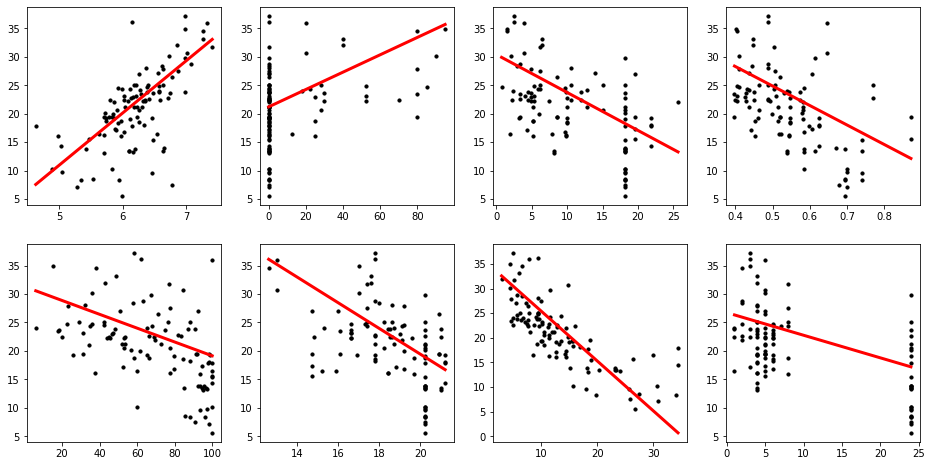

In [28]:
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    
#     모델 핏
    X = bostonDF[feature]
    Y = boston.target
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 150)
    sim_lr.fit(X_train.values.reshape(-1, 1), y_train)
    y_pred = sim_lr.predict(X_test.values.reshape(-1, 1))
    
    row = int(i/4)
    col = i%4
    
    ax = axs[row][col]
    ax.scatter(X_test, y_test, s = 10, c = 'black')
    line_x = np.linspace(np.min(X_test), np.max(X_test), 10)
    line_y = sim_lr.predict(line_x.reshape(-1, 1))
    ax.plot(line_x, line_y, c = 'red', lw = 3)

### Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt_regr = DecisionTreeRegressor(max_depth=5)

In [31]:
dt_regr.fit(X_train.values.reshape(-1, 1), y_train)

DecisionTreeRegressor(max_depth=5)

In [32]:
y_pred_dt = dt_regr.predict(X_test.values.reshape(-1, 1))

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

In [34]:
rmse

6.196902920666687

### Support Vector Machine Regressor

In [35]:
from sklearn.svm import SVR

In [36]:
svm_regr = SVR()

In [37]:
svm_regr.fit(X_train.values.reshape(-1, 1), y_train)

SVR()

In [38]:
y_pred_svm = svm_regr.predict(X_test.values.reshape(-1, 1))

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))

In [40]:
rmse

5.7873022983799505

### 다중 회귀

In [41]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 150)

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [44]:
print('MSE : {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 18.523, RMSE: 4.304
Variance score: 0.643


In [45]:
print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값:  40.06307283936257
회귀 계수값:  [ -0.1   0.1   0.    3.3 -21.1   3.7   0.   -1.7   0.3  -0.   -1.    0.
  -0.6]


In [46]:
# 해당 변수들의 회귀 계수값
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.7
CHAS        3.3
RAD         0.3
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -1.0
DIS        -1.7
NOX       -21.1
dtype: float64

In [47]:
from sklearn.model_selection import cross_val_score
# scoring = 'neg_mean_squared_error'로 인자값을 주면 음수로 반환
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829 


### 5.5 다항 회귀

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X = bostonDF['LSTAT']
pf = poly.fit_transform(X.values.reshape(-1, 1))

In [49]:
# 1, x, x^2
print(pf.shape)
print(pf)

(506, 3)
[[ 1.      4.98   24.8004]
 [ 1.      9.14   83.5396]
 [ 1.      4.03   16.2409]
 ...
 [ 1.      5.64   31.8096]
 [ 1.      6.48   41.9904]
 [ 1.      7.88   62.0944]]


In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 150)
pf_train = poly.fit_transform(x_train.values.reshape(-1, 1))
pf_test = poly.fit_transform(x_test.values.reshape(-1, 1))

In [51]:
lr = LinearRegression()
lr.fit(pf_train, y_train)
y_pred = lr.predict(pf_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
rmse

4.47

In [52]:
lr.coef_

array([ 0.        , -2.45313968,  0.04669076])

In [53]:
lr.intercept_

43.95756417441354

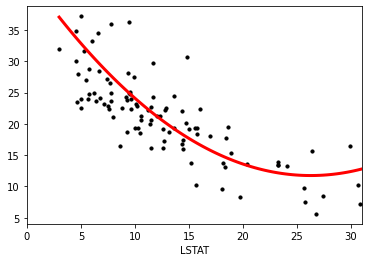

In [54]:
xs = np.linspace(np.min(x_test), np.max(x_test), 100)
line_x = poly.fit_transform(xs.reshape(-1, 1))
line_y = lr.predict(line_x)
plt.scatter(x_test, y_test, s = 10, c = 'black')
plt.plot(xs, line_y, c= 'red', lw = 3)
plt.xlim(0, 31)
plt.xlabel('LSTAT')
plt.show()

### 5.6 - 규제 선형 모델

In [55]:
from sklearn.linear_model import Ridge

In [56]:
# 알파값을 작게하면 기존의 비용함수 식과 같지만 알파값을 크게 하면 alpha*W일 때 W(회귀 계수)를 작게 만들어 과적합을 개선시킨다.
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds 의 개별 RMSE scores :  [3.38 4.93 5.31 8.64 5.34]
5 folds 의 평균 RMSE : 5.518 


In [57]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


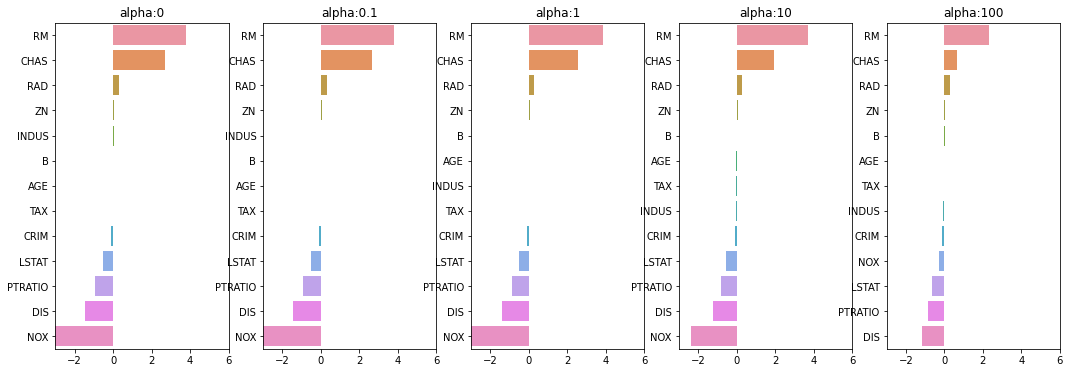

In [58]:
fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols = 5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])
plt.show()

In [59]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [60]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w * x + b)))

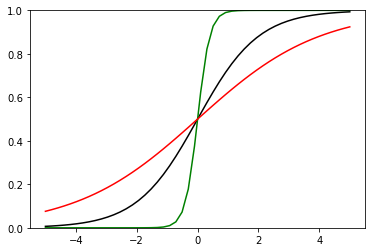

In [61]:
# w 기울기에 따른 그래프 변화 / w가 커질수록 그래프가 가파르다.
xs = np.linspace(-5, 5)
y1 = sigmoid(xs, 1, 0)
y5 = sigmoid(xs, 5, 0)
y05 = sigmoid(xs, 0.5, 0)
plt.plot(xs, y1, 2, c = 'k')
plt.plot(xs, y5, 2, c = 'g')
plt.plot(xs, y05, 2, c = 'r')
plt.ylim(0, 1)
plt.show()

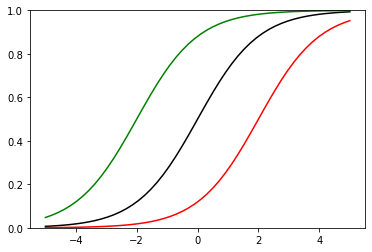

In [62]:
# y절편에 따른 그래프 변화 / b의 변화는 그래프가 평행이동한다.
xs = np.linspace(-5, 5)
y1 = sigmoid(xs, 1, 0)
y5 = sigmoid(xs, 1, 2)
y05 = sigmoid(xs, 1, -2)
plt.plot(xs, y1, 2, c = 'k')
plt.plot(xs, y5, 2, c = 'g')
plt.plot(xs, y05, 2, c = 'r')
plt.ylim(0, 1)
plt.show()

In [63]:
from sklearn.ensemble import RandomForestRegressor

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds 의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 folds 의 평균 RMSE : 4.423 


In [64]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__,'#####')
    print('5 교차 검증의 평균 RMSE: {0:.3f} '.format(avg_rmse))

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

In [ ]:
import seaborn as sns

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [ ]:
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n = 100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")

In [ ]:
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols = 3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

ax2.set_title('Decision Tree Regression: \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax2.plot(X_test, pred_rf2, label = 'max_depth:3', linewidth = 2)

ax3.set_title('Decition Tree Regression: \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = 'darkorange')
ax3.plot(X_test, pred_rf7, label = 'max_depth: 7', linewidth = 2)